In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'


In [2]:
seq_mouse = pd.read_csv("/home/rohan/Remote-AI/dat/proc/nautilex/prot_nuc_seqs_mouse.csv")
seq_human = pd.read_csv("/home/rohan/Remote-AI/dat/proc/nautilex/prot_nuc_seqs_human.csv")

aa_adata_mouse = sc.read_h5ad('aa_seqs_emb_mouse.h5ad')
aa_adata_human = sc.read_h5ad('aa_seqs_emb_human.h5ad')
nuc_adata_mouse = sc.read_h5ad('nuc_seqs_emb_mouse.h5ad')
nuc_adata_human = sc.read_h5ad('nuc_seqs_emb_human.h5ad')

print("mouse ----")
print("total genes: ", seq_mouse.shape[0])
print("safety exceptions: ",aa_adata_mouse.obs["safety_check"].sum())
print("total passed (including workarounds): ",aa_adata_mouse.obs["pass_filter"].sum())


print("\n")
print("human:")
print("total genes: ", seq_human.shape[0])
print("safety exceptions: ",aa_adata_human.obs["safety_check"].sum())
print("total passed (including workarounds): ",aa_adata_human.obs["pass_filter"].sum())

mouse ----
total genes:  20909
safety exceptions:  578
total passed (including workarounds):  20877


human:
total genes:  19364
safety exceptions:  622
total passed (including workarounds):  19338


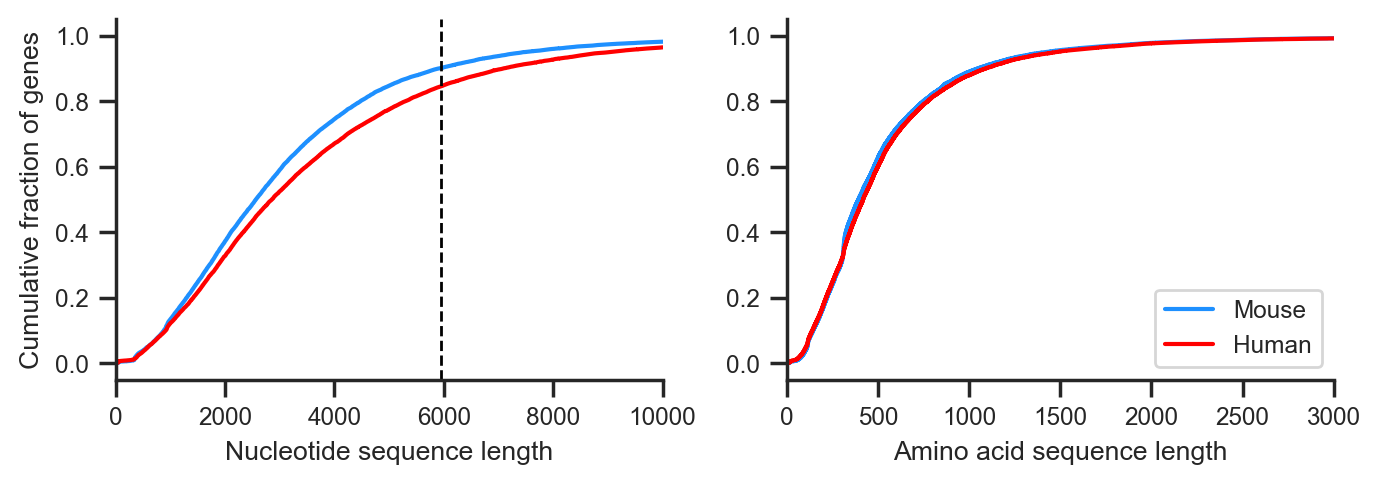

In [3]:
f, ax = plt.subplots(1,2, figsize=(7, 2.5))

# Mouse nucleotide sequences
sorted_nuc_mouse = np.sort(seq_mouse["nuc_seq_length"])
cumulative_nuc_mouse = np.arange(1, len(sorted_nuc_mouse) + 1) / len(sorted_nuc_mouse)
ax[0].plot(sorted_nuc_mouse, cumulative_nuc_mouse, c="dodgerblue")

# Human nucleotide sequences
sorted_nuc_human = np.sort(seq_human["nuc_seq_length"])
cumulative_nuc_human = np.arange(1, len(sorted_nuc_human) + 1) / len(sorted_nuc_human)
ax[0].plot(sorted_nuc_human, cumulative_nuc_human, c="red")
ax[0].axvline(x=5952, color='black', linestyle='--', linewidth=1)
ax[0].set(xlabel="Nucleotide sequence length", ylabel="Cumulative fraction of genes", xlim=(0, 10000))

# Mouse amino acid sequences
sorted_aa_mouse = np.sort(seq_mouse["aa_seq_length"])
cumulative_aa_mouse = np.arange(1, len(sorted_aa_mouse) + 1) / len(sorted_aa_mouse)
ax[1].plot(sorted_aa_mouse, cumulative_aa_mouse, c="dodgerblue", label="Mouse")

# Human amino acid sequences
sorted_aa_human = np.sort(seq_human["aa_seq_length"])
cumulative_aa_human = np.arange(1, len(sorted_aa_human) + 1) / len(sorted_aa_human)
ax[1].plot(sorted_aa_human, cumulative_aa_human, c="red", label="Human")
ax[1].set(xlabel="Amino acid sequence length",xlim=(0, 3000))

plt.legend()
plt.tight_layout()
plt.savefig("length_dist.png", dpi=300)
plt.show()

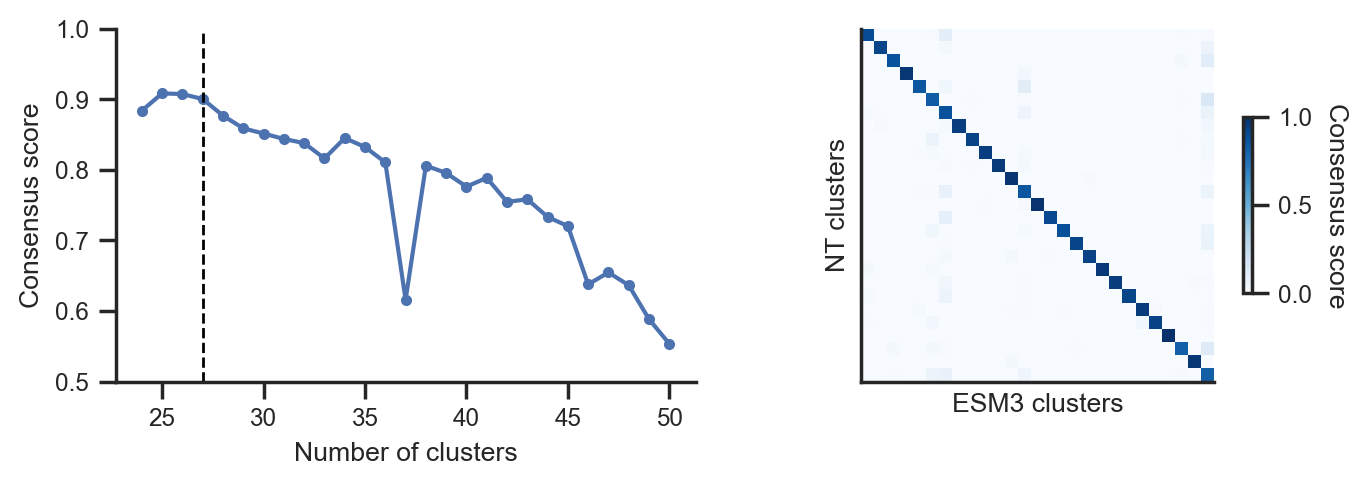

In [4]:
sel_ = pd.read_csv(f"mouse_c_selection.csv")
cons_ = pd.read_csv(f"mouse_cons_mat_score_0.92.csv", header=None)

f, ax = plt.subplots(1,2, figsize=(7, 2.5))
ax[0].plot(sel_["num_c"], sel_["consensus"], '.-')
ax[0].axvline(x=27, color='black', linestyle='--', linewidth=1)
ax[0].set(xlabel='Number of clusters', ylabel='Consensus score', ylim=(0.5, 1))
ax[1].imshow(cons_.values, cmap="Blues")
# add cbar
cbar = ax[1].figure.colorbar(ax[1].imshow(cons_.values, cmap="Blues"), ax=ax[1], shrink=0.5)
cbar.ax.set_ylabel("Consensus score", rotation=-90, va="bottom")
ax[1].set(xlabel='ESM3 clusters', ylabel='NT clusters', xticks=[], yticks=[], xticklabels=[], yticklabels=[])
f.align_xlabels()
plt.tight_layout()
plt.savefig("mmidas_consensus.png", dpi=300)
plt.show()
